In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

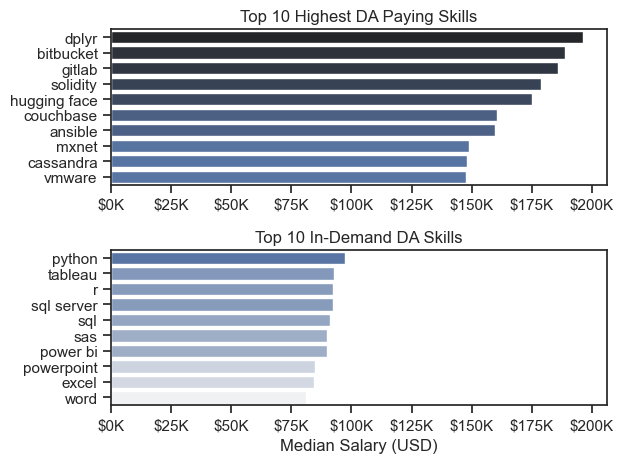

In [9]:
sns.set_theme(style="ticks")

df_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset=["salary_year_avg"])
df_US_jobs = df_US.explode("job_skills")
# df_US_jobs[["salary_year_avg", "job_skills"]]
df_US_jobs = df_US_jobs.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_top_pay = df_US_jobs.sort_values(by="median", ascending=False).head(10)
df_top_skills = df_US_jobs.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False).head(10)
fig, ax = plt.subplots(2, 1)

sns.barplot(data=df_top_pay, x="median", y=df_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r", legend=False)
# df_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest DA Paying Skills")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

sns.barplot(data=df_top_skills, x="median", y=df_top_skills.index, ax=ax[1], hue="median", palette="light:b", legend=False)
# df_top_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 In-Demand DA Skills")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout()

